# Week 5 handin

## 01 Assignment
https://github.com/Hartmannsolution/docker_notebooks/blob/master/notebooks/05-Exercise.ipynb

## 02 Status
Done all of part 1

## 03 Solution part 1

In [5]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Utility functions

def calc_percent_difference(new_value, old_value):
    return (((new_value-old_value) / old_value) * 100)

def calc_percent_of(new_value, old_value):
    return ((old_value/new_value) * 100)

# For hvert index der er i D1 længde, udregn procent mellem de to DF.
def calc_two_matched_columns(df_1, df_2, column_name):
    data_list = []
    for i in range(0, len(df_1)):
        data_list.append([calc_percent_of(df_1[column_name][i], df_2[column_name][i])])
    return data_list

Divorced danes from 2008 to 2020 in percentage: 
28.809832487688404


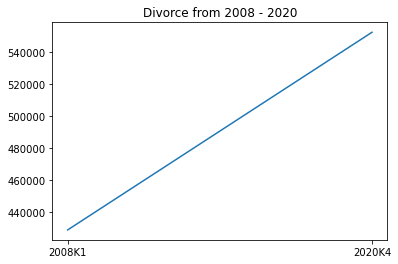

In [6]:

# With data aggregation and data visualization answer the following questions:
# D. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs


# A. What is the change in pct of divorced danes from 2008 to 2020?

data = pd.read_csv('/home/jovyan/data/FOLK1A_FRASKILT.csv', sep=';')

divorce_percentage = calc_percent_difference(data.INDHOLD[1], data.INDHOLD[0])

plt.title('Divorce from 2008 - 2020')
plt.plot(data.TID, data.INDHOLD)
print('Divorced danes from 2008 to 2020 in percentage: ')
print(divorce_percentage)





In [20]:

# B. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Sort data for 5 biggest cities
not_a_city = ['Hele landet', 'Region Hovedstaden', 'Region Midtjylland', 'Region Syddanmark', 'Region Sjælland', 
              'Region Nordjylland']

data_byer_indbygger = pd.read_csv('/home/jovyan/data/FOLK1A_BYER_POPULATION.csv', delimiter=";")
data_byer_indbygger = data_byer_indbygger.set_index('OMRÅDE').sort_values(by=['INDHOLD'], ascending=False)
fem_største_byer = data_byer_indbygger.drop(data_byer_indbygger[data_byer_indbygger.index.isin(not_a_city)].index)[:5]

data_UGift_Antal = pd.read_csv('/home/jovyan/data/FOLK1A_UGIFT_2020.csv', delimiter=";")

# Få fat i 5 største byer med UGift
data_UGift_Antal = data_UGift_Antal.drop(data_UGift_Antal[data_UGift_Antal['OMRÅDE'].isin(fem_største_byer.index) == False].index).set_index('OMRÅDE')

data_UGift_Antalhalflength = int((len(data_UGift_Antal)/2))

data_UGift_Antal_all= data_UGift_Antal.iloc[:data_UGift_Antalhalflength, :]
data_UGift_Antal_notmarried =data_UGift_Antal.iloc[data_UGift_Antalhalflength:, :]

ugift_procent = pd.DataFrame(index=data_UGift_Antal_all.index, columns=['Percent'], 
                    data=calc_two_matched_columns(data_UGift_Antal_all, data_UGift_Antal_notmarried, 'INDHOLD')).sort_values(by='Percent', ascending=False)

print("Exercise 1.5.B - Procent aldrig gift af de 5 største byer: ")
print(ugift_procent)

Exercise 1.5.B - Procent aldrig gift af de 5 største byer: 
             Percent
OMRÅDE              
København  65.489642
Aarhus     59.942282
Odense     55.196448
Aalborg    54.820118
Vejle      47.242961


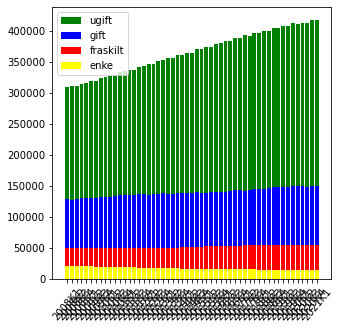

In [18]:
#C Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

data_for_bar = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&Tid=*&CIVILSTAND=U%2CG%2CE%2CF', sep=";")

tid = sorted(list(set(data_for_bar['TID'])))

ugift = data_for_bar.loc[data_for_bar['CIVILSTAND'] == 'Ugift']['INDHOLD']
gift = data_for_bar.loc[data_for_bar['CIVILSTAND'] == 'Gift/separeret']['INDHOLD']
enke = data_for_bar.loc[data_for_bar['CIVILSTAND'] == 'Enke/enkemand']['INDHOLD']
fraskilt = data_for_bar.loc[data_for_bar['CIVILSTAND'] == 'Fraskilt']['INDHOLD']

plt.figure(figsize=(5,5))
plt.xticks(rotation=50)

p1 = plt.bar(tid, ugift, color='green')
p2 = plt.bar(tid, gift, color='blue')
p3 = plt.bar(tid, fraskilt, color='red')
p4 = plt.bar(tid, enke, color='yellow')

plt.legend([p1,p2,p3,p4],['ugift', 'gift','fraskilt', 'enke'])

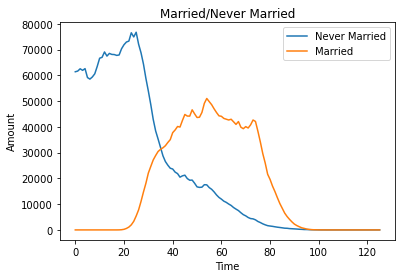

In [19]:
#D Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020

data_for_plots = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G%2CU&Tid=2020K4&ALDER=*', sep=";")

tid = list(range(0, 126))

ugift = data_for_plots.loc[data_for_plots['CIVILSTAND'] == 'Ugift']['INDHOLD'][1:]
gift = data_for_plots.loc[data_for_plots['CIVILSTAND'] == 'Gift/separeret']['INDHOLD'][1:]

plt.title('Married/Never Married')
plt.xlabel('Time')
plt.ylabel('Amount')

plt.plot(tid, ugift, label="Never Married")
plt.plot(tid, gift, label="Married")

plt.legend()